In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.linear_model import LogisticRegression


In [3]:
#  Load Dataset
dataset = fetch_openml(name='adult', version=2)
X = dataset.data
y = dataset.target



In [4]:
# Handle Missing Values
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [5]:
#  Encode Categorical Variables
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le


In [6]:

# Encode target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)


In [7]:

#Reduce Dataset to 50%
X_reduced, y_reduced = X.sample(frac=0.5, random_state=42), y[X.sample(frac=0.5, random_state=42).index]


In [8]:
#  Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)


In [9]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_reduced, test_size=0.2, random_state=42)


In [10]:
# Random Forest Model and Hyperparameter Grid
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [11]:
#  SVM Model and Hyperparameter Grid
svm = SVC(random_state=42)
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}


In [ ]:
#  Logistic Regression Model and Hyperparameter Grids
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'saga']
}


In [37]:
#  Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_


Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [38]:
#  Grid Search for SVM
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)
best_svm = svm_grid_search.best_estimator_


Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [45]:
#  Grid Search for Logistic Regression
log_reg_grid_search = GridSearchCV(estimator=log_reg, param_grid=log_reg_param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
log_reg_grid_search.fit(X_train, y_train)
best_log_reg_grid = log_reg_grid_search.best_estimator_


Fitting 3 folds for each of 60 candidates, totalling 180 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = 

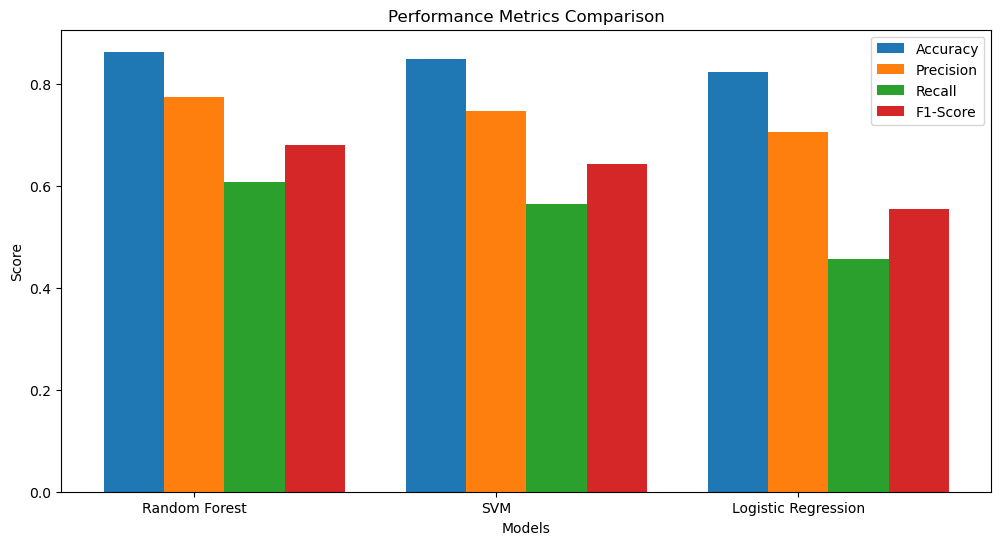

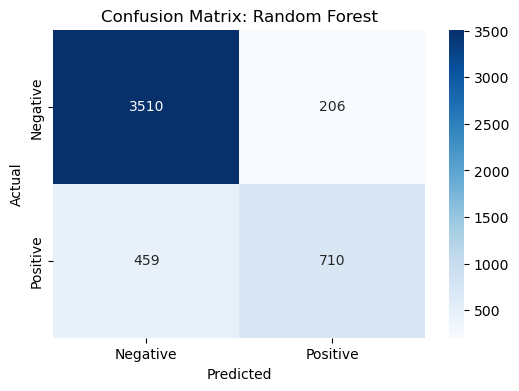

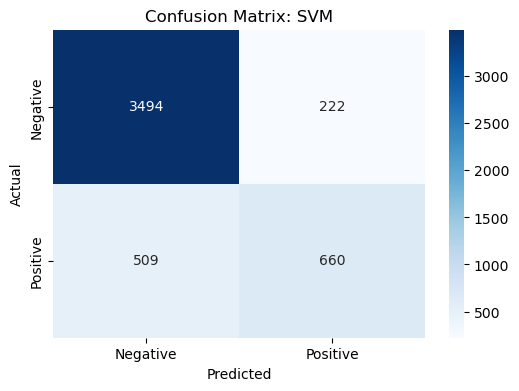

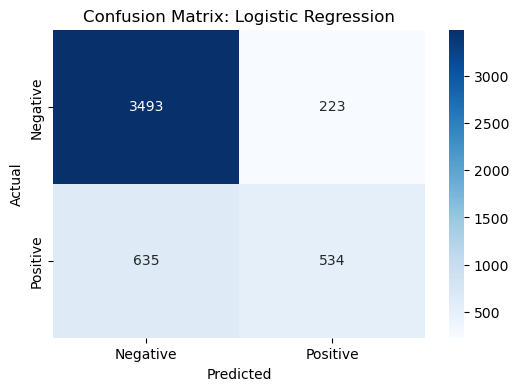

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Add models to the dictionary
models = {
    'Random Forest': best_rf,
    'SVM': best_svm,
    'Logistic Regression': best_log_reg_grid
}

# Initialize metrics dictionary
metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
conf_matrices = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-Score'].append(f1_score(y_test, y_pred))
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Bar Chart for Performance Metrics
plt.figure(figsize=(12, 6))
x = list(models.keys())
bar_width = 0.2
for i, metric in enumerate(metrics.keys()):
    plt.bar([j + i * bar_width for j in range(len(x))], metrics[metric], width=bar_width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.xticks([r + bar_width for r in range(len(x))], x)
plt.legend()
plt.show()

# Confusion Matrices for Each Model
for name, matrix in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [16]:
# Randomized Search for SVM with reduced parallelization
svm_random_search = RandomizedSearchCV(estimator=svm, param_distributions=svm_param_grid, n_iter=50, 
                                       cv=3, scoring='f1', verbose=2, random_state=42, n_jobs=1)
svm_random_search.fit(X_train, y_train)
best_svm_random = svm_random_search.best_estimator_


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.1min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.1min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  13.8s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  15.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  16.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  23.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  23.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  33.3s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  14.5s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  17.1s
[CV] END ....................C=0.1, gamma=0.1, k

In [17]:
# Randomized Search for Random Forest with reduced parallelization
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=50, 
                                      cv=3, scoring='f1', verbose=2, random_state=42, n_jobs=1)
rf_random_search.fit(X_train, y_train)
best_rf_random = rf_random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; 

In [18]:
# Randomized Search for Logistic Regression with reduced parallelization
log_reg_random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=log_reg_param_grid, 
                                           n_iter=50, cv=3, scoring='f1', verbose=2, random_state=42, n_jobs=1)
log_reg_random_search.fit(X_train, y_train)

# Get the best Logistic Regression model from RandomizedSearchCV
best_log_reg_random = log_reg_random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.3s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...................C=10, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...................C=10, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...................C=10, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...................

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .................C=0.01, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.01, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..................C=0.01, penalty=None, solver=saga; total time=   0.1s
[CV] END ..................C=0.01, penalty=None, solver=saga; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..................C=0.01, penalty=None, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=10, penalty=None, solver=saga; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=10, penalty=None, solver=saga; total time=   0.0s
[CV] END ....................C=10, penalty=None, solver=saga; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=1, penalty=None, solver=saga; total time=   0.0s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   0.0s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...................C=0.1, penalty=None, solver=saga; total time=   0.0s
[CV] END ...................C=0.1, penalty=None, solver=saga; total time=   0.0s
[CV] END ...................C=0.1, penalty=None, solver=saga; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.01, penalty=None, solver=liblinear; total time=   0.0s
[CV] END .............C=0.01, penalty=None, solver=liblinear; total time=   0.0s
[CV] END .............C=0.01, penalty=None, solver=liblinear; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = 

Model Evaluation Metrics:

Accuracy:
  SVM: 0.8504
  Random Forest: 0.8633
  Logistic Regression: 0.8244

Precision:
  SVM: 0.7483
  Random Forest: 0.7768
  Logistic Regression: 0.7054

Recall:
  SVM: 0.5646
  Random Forest: 0.6014
  Logistic Regression: 0.4568

F1-Score:
  SVM: 0.6436
  Random Forest: 0.6779
  Logistic Regression: 0.5545



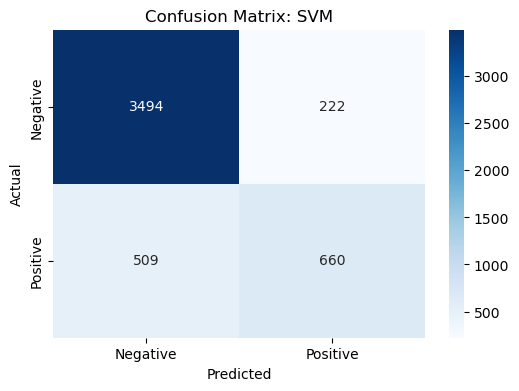

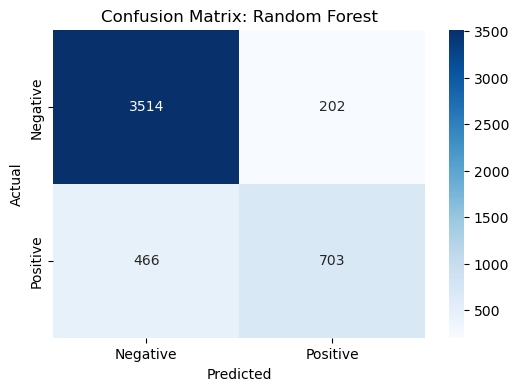

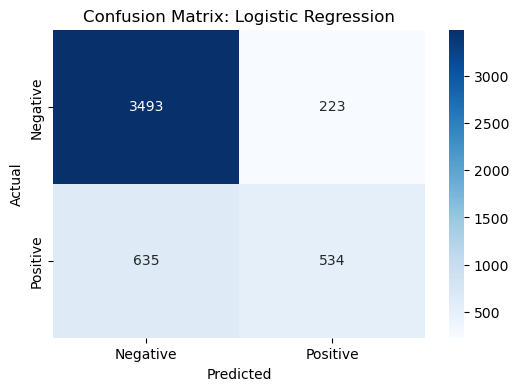

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store the models
models = {
    'SVM': best_svm_random,
    'Random Forest': best_rf_random,
    'Logistic Regression': best_log_reg_random
}

# Dictionary to store evaluation metrics
metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
conf_matrices = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-Score'].append(f1_score(y_test, y_pred))
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Model Evaluation Metrics:\n")
for metric, values in metrics.items():
    print(f"{metric}:")
    for model_name, score in zip(models.keys(), values):
        print(f"  {model_name}: {score:.4f}")
    print()

# Plot Confusion Matrices
for name, matrix in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
 